In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr


In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df = pd.read_csv('./data/맛집 데이터 3.5 이상 (1).csv')

In [9]:
income_tax = pd.read_csv('./data/구별 소득세.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000


In [10]:
income_tax = income_tax.drop('Unnamed: 0', axis=1)
income_tax

,구,소득세
0,도봉구,227929
1,노원구,404969
2,강북구,146936
3,은평구,413900
4,종로구,3169471
5,성북구,863338
6,동대문구,523330
7,중랑구,259445
8,서대문구,715787
9,마포구,1427778


In [7]:
num = df['구'].value_counts()
test = pd.DataFrame(num)
test.head()

,구
강남구,81
마포구,73
용산구,71
종로구,66
서초구,65


In [11]:
test2 = test.rename(columns={'구': '구별맛집수'})
test2['구'] = test2.index
test2.set_index('구',inplace=True)
test2.head()

,구별맛집수
구,
강남구,81
마포구,73
용산구,71
종로구,66
서초구,65


In [12]:
income_tax.set_index('구',inplace=True)
income_tax.head()

,소득세
구,
도봉구,227929
노원구,404969
강북구,146936
은평구,413900
종로구,3169471


In [8]:
li = []
for i in range(0,25) :
    a = test2.index[i].replace(' ','')
    li.append(a)
li
test2.index= li
test2.head()

,구
강남구,81
마포구,73
용산구,71
종로구,66
서초구,65


In [17]:
Fin_df= income_tax.merge(test2,left_index=True, right_index=True, how='outer')
Fin_df = Fin_df.reset_index()
Fin_df.head()

,구,소득세,구별맛집수
0,강남구,10239094,81
1,강동구,899452,15
2,강북구,146936,5
3,강서구,1098252,13
4,관악구,426240,27


In [23]:
Fin_df.to_csv('./data/소득세와 맛집수.csv')

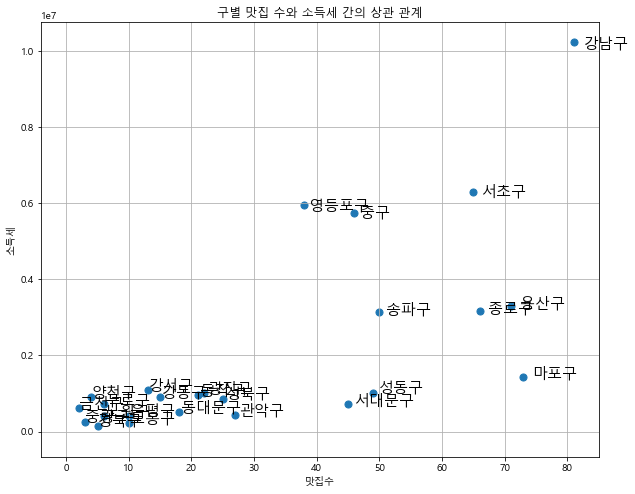

In [20]:
fp1 = np.polyfit(Fin_df['구별맛집수'], Fin_df['소득세'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(0, 200, 1)

plt.figure(figsize=(10,8))
plt.scatter(Fin_df['구별맛집수'], Fin_df['소득세'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(Fin_df['구별맛집수'][n]*1.02, Fin_df['소득세'][n]*0.98, 
             Fin_df.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 소득세 간의 상관 관계")   
plt.xlabel('맛집수')
plt.ylabel('소득세')
plt.grid()
plt.show()

In [21]:
print(pearsonr(Fin_df['구별맛집수'], Fin_df['소득세']))

(0.7081861588087626, 7.467343220764394e-05)
